# Outlier Detection and Removal Using IQR
IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts. <br>
Where, \
--->Q1 represents the 25th percentile of the data. \
--->Q2 represents the 50th percentile of the data. \
--->Q3 represents the 75th percentile of the data. 
    
If a dataset has 2n / 2n+1 data points, then \
Q1 = median of the dataset. \
Q2 = median of n smallest data points. \
Q3 = median of n highest data points. 

IQR is the range between the first and the third quartiles namely Q1 and Q3: __IQR = Q3 – Q1__. \
The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

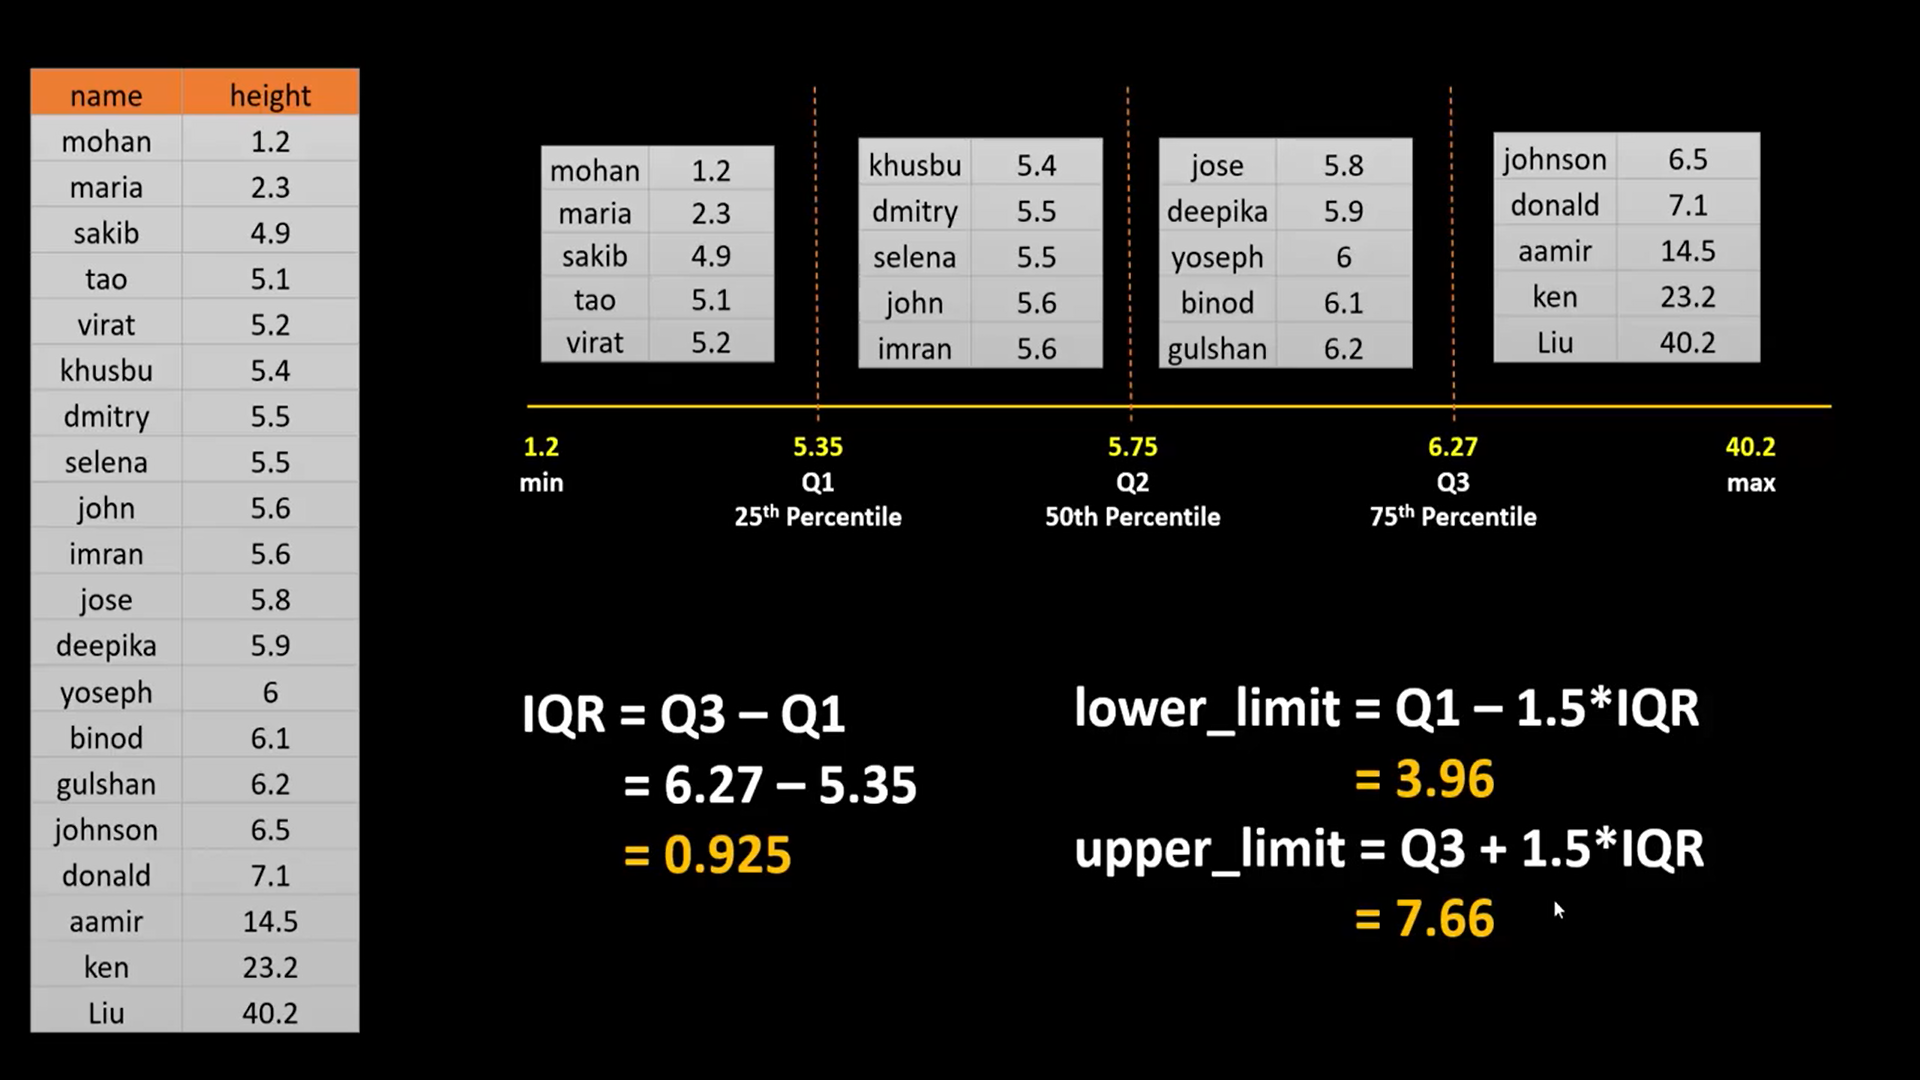

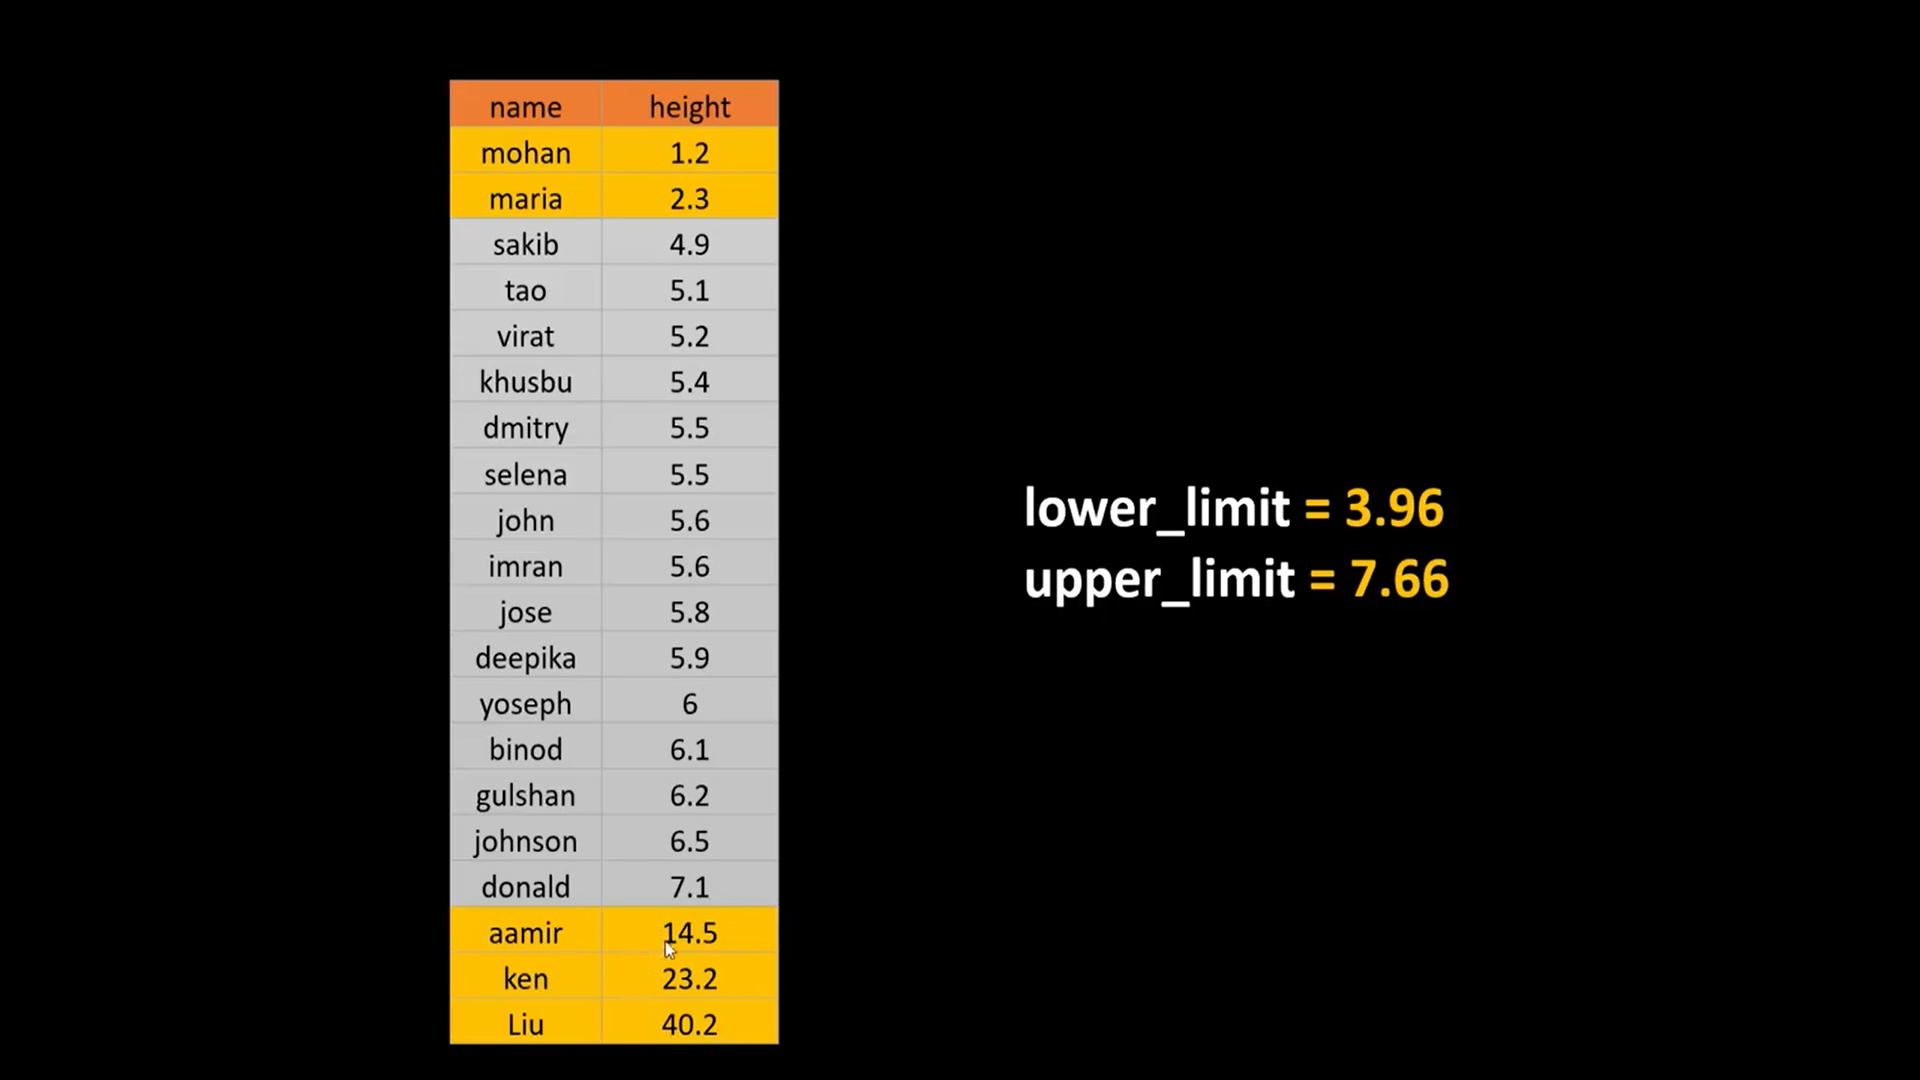

In [1]:
import pandas as pd
df = pd.read_csv("Datasets/heights_01.csv")
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [2]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [3]:
# Outlier detection using IQR
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(5.3500000000000005, 6.275)

In [4]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [5]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.962500000000001, 7.6625)

In [6]:
# the outliers are
df[(df.height<lower_limit)|(df.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [7]:
# removing outliers
df_no_outlier = df[(df.height>lower_limit)&(df.height<upper_limit)]
df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9
